#Proyecto v2

# Pre-procesamiento de datos

## Instalaciones y librerías importadas

In [ ]:
pip install requests pandas

In [ ]:
## Visualizar datos
import pandas as pd
import os

## Graficar datos
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Discretización
import numpy as np

## Q_learning
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from tabulate import tabulate

##Conectar a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importar carpetas

Se van a seleccionar los datos del día 17/06/2025 pues representa la mas alta variabilidad pra uno de los 5 sensores del laboratorio y contienen un valor relativamente bueno de variabilidad para los otros sensores

**Tabla Combinada de Varianzas por Sensor y Fecha**

---

| Sensor | 2025-06-07 | 2025-05-15 | 2025-06-17 | 2025-05-27 | 2025-05-28 |
| :--------------------- | :--------- | :--------- | :--------- | :--------- | :--------- |
| LabclimateUno          | 0.8725     | 3.5814     | 1.6101     | 0.8568     | 2.6708     |
| LabclimateTres         | 0.5518     | 1.8405     | 2.7510     | 7.5940     | 4.9506     |
| LabclimateDos          | 0.1907     | 2.4439     | 2.2598     | 1.0053     | 2.9346     |
| LabclimateCuatro       | 0.4152     | 0.5233     | 1.6886     | 0.8282     | No existe  |
| LabclimateCinco        | 0.7235     | No existe  | 2.8603   | 0.6747     | 4.0897     |
| Estación meteorológica | 13.9143     | 5.4028     | 4.1377     | No existe  | No existe  |

---

In [ ]:
## Datos de labclimate y la estación meteorológica
labclimateUno = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-labclimateUno.csv"
labclimateTres = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-labclimateTres.csv"
labclimateDos = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-labclimateDos.csv"
labclimateCuatro = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-labclimateCuatro.csv"
estMeteorologica = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-Estación Meteorológica Jardín Delantero LST.csv"



## Datos del aire acondicionado
Shelly_Iz = "/content/drive/MyDrive/MachineLearning/Datos/hayIot-Shelly_Iz.csv"       ##Solo un shelly porque el otro está dañado

### Horario
Nota: ESTO DEBE ESTAR EN UN ARCHIVO CSV Y LUEGO SE LO IMPORTA AL IGUAL QUE LOS DATOS ANTERIORES

In [ ]:
horario = {
    'Hora': [
        '7:00-7:30', '7:30-8:00', '8:00-8:30', '8:30-9:00', '9:00-9:30',
        '9:30-10:00', '10:00-10:30', '10:30-11:00', '11:00-11:30', '11:30-12:00',
        '12:00-12:30', '12:30-13:00', '13:00-13:30', '13:30-14:00', '14:00-14:30',
        '14:30-15:00', '15:00-15:30', '15:30-16:00', '16:00-16:30', '16:30-17:00',
        '17:00-17:30', '17:30-18:00', '18:00-18:30'
    ],
    'Lunes': [
        'Vacío', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases',
        'Clases', 'Clases', 'Clases', 'Clases', 'Vacío', 'Clases', 'Clases', 'Clases',
        'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Vacío'
    ],
    'Martes': [
        'Vacío', 'Laboratorio abierto', 'Laboratorio abierto', 'Laboratorio abierto', 'Clases',
        'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Vacío',
        'Vacío', 'Laboratorio abierto', 'Laboratorio abierto', 'Laboratorio abierto',
        'Laboratorio abierto', 'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Vacío'
    ],
    'Miércoles': [
        'Vacío', 'Laboratorio abierto', 'Laboratorio abierto', 'Laboratorio abierto',
        'Laboratorio abierto', 'Clases', 'Clases', 'Clases', 'Clases', 'Clases',
        'Clases', 'Clases', 'Clases', 'Clases', 'Clases', 'Vacío', 'Vacío', 'Vacío',
        'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Vacío'
    ],
    'Jueves': [
        'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Laboratorio abierto', 'Laboratorio abierto',
        'Laboratorio abierto', 'Laboratorio abierto', 'Laboratorio abierto', 'Clases',
        'Clases', 'Clases', 'Clases', 'Clases', 'Laboratorio abierto', 'Laboratorio abierto',
        'Laboratorio abierto', 'Laboratorio abierto', 'Vacío', 'Vacío', 'Vacío', 'Vacío',
        'Vacío'
    ],
    'Viernes': [
        'Vacío', 'Vacío', 'Vacío', 'Vacío', 'Clases', 'Clases', 'Clases', 'Clases',
        'Clases', 'Clases', 'Clases', 'Clases', 'Vacío', 'Vacío', 'Laboratorio abierto',
        'Laboratorio abierto', 'Laboratorio abierto', 'Vacío', 'Vacío', 'Vacío', 'Vacío',
        'Vacío', 'Vacío'
    ]
}

##Visualizar datos seleccionados

###Funciones

In [ ]:
def archivo_a_dataframe(ruta_archivo):
  # Verificar que el archivo existe
  if os.path.exists(ruta_archivo):
      # Cargar los datos desde el archivo CSV
      df = pd.read_csv(ruta_archivo)

      # Convertir la columna de fecha a datetime
      df['sensedAt'] = pd.to_datetime(df['sensedAt'])

      # Reorganizar la tabla con pivot
      df_pivot = df.pivot(index='sensedAt', columns='type', values='data')

      # Reiniciar el índice para tener 'sensedAt' como columna
      df_pivot.reset_index(inplace=True)

      # Separar la columna 'sensedAt' en 'Fecha' y 'Hora'
      df_pivot['Fecha'] = df_pivot['sensedAt'].dt.date
      df_pivot['Hora'] = df_pivot['sensedAt'].dt.time

      # Eliminar la columna original 'sensedAt' si ya no es necesaria
      # df_pivot.drop('sensedAt', axis=1, inplace=True) # Uncomment if you want to remove the original column

      # Mostrar la tabla
      print("Tabla de datos reorganizada:")
      print(df_pivot)
  else:
      print(f"No se encontró el archivo en la ruta especificada: {ruta_archivo}")
  return df_pivot

In [ ]:
def graficar_datos(df_pivot):

  # Obtener columnas de datos disponibles (excluyendo 'sensedAt', 'Fecha', 'Hora')
  value_columns = df_pivot.columns.tolist()
  columns_to_remove = ['sensedAt', 'Fecha', 'Hora']
  value_columns = [col for col in value_columns if col not in columns_to_remove]

  if not value_columns:
      print("No hay columnas numéricas para graficar.")
      return

  # Crear widgets
  value_dropdown = widgets.Dropdown(
      options=value_columns,
      description='Seleccione el valor:',
      disabled=False,
  )

  plot_button = widgets.Button(
      description='Mostrar Gráfica',
      disabled=False,
      button_style='success',
      tooltip='Mostrar gráfica',
      icon='bar-chart'
  )

  output_widget = widgets.Output() # Widget para mostrar la gráfica y mensajes

  # Función para manejar el clic del botón
  def on_plot_button_clicked(b):
      selected_value = value_dropdown.value

      if selected_value in df_pivot.columns:
          plt.figure(figsize=(12, 6))
          plt.plot(df_pivot['sensedAt'], df_pivot[selected_value])
          plt.xlabel('Tiempo (sensedAt)')
          plt.ylabel(selected_value)
          plt.title(f'Gráfica de {selected_value} vs Tiempo')
          plt.grid(True)

          plt.xticks(
              ticks=df_pivot['sensedAt'][::50],
              labels=df_pivot['Hora'][::50],
              rotation=90
          )

          plt.tight_layout()
          plt.show()
      else:
          print(f"La columna '{selected_value}' no se encontró en el DataFrame.")

  # Asignar la función al evento de clic del botón
  plot_button.on_click(on_plot_button_clicked)

  # Mostrar los widgets
  print("Seleccione el valor que desea graficar:")
  display(value_dropdown, plot_button)


In [ ]:
## def horario_a_dataframe
## def formulario_a_dataframe

###Variables de datos dfs

Se recupera toda la información de los csv

In [ ]:
df_labclimateUno = archivo_a_dataframe(labclimateUno)
df_labclimateTres = archivo_a_dataframe(labclimateTres)
df_labclimateDos = archivo_a_dataframe(labclimateDos)
df_labclimateCuatro = archivo_a_dataframe(labclimateCuatro)
df_estMeteorologica = archivo_a_dataframe(estMeteorologica)

df_shelly_iz = archivo_a_dataframe(Shelly_Iz)

Tabla de datos reorganizada:
type            sensedAt  co2-concentration  humidity  temp       Fecha  \
0    2025-06-17 05:00:07              200.0      79.0  25.0  2025-06-17   
1    2025-06-17 05:03:09              200.0      79.0  26.0  2025-06-17   
2    2025-06-17 05:06:11              200.0      79.0  25.0  2025-06-17   
3    2025-06-17 05:09:14              200.0      79.0  26.0  2025-06-17   
4    2025-06-17 05:12:16              200.0      79.0  25.0  2025-06-17   
..                   ...                ...       ...   ...         ...   
462  2025-06-18 04:45:29              200.0      81.0  26.0  2025-06-18   
463  2025-06-18 04:48:32              200.0      81.0  26.0  2025-06-18   
464  2025-06-18 04:51:35              200.0      82.0  26.0  2025-06-18   
465  2025-06-18 04:54:38              200.0      82.0  26.0  2025-06-18   
466  2025-06-18 04:57:41              200.0      84.0  26.0  2025-06-18   

type      Hora  
0     05:00:07  
1     05:03:09  
2     05:06:11  
3 

Se mantienen solamente los datos a utilizar en el entrenamiento, en este caso solo temperatura

In [ ]:
columnas_a_conservar = ['Fecha', 'Hora', 'sensedAt', 'temp']


df_labclimateUno = df_labclimateUno[columnas_a_conservar]
print(df_labclimateUno.head())


df_labclimateTres = df_labclimateTres[columnas_a_conservar]
print(df_labclimateTres.head())


df_labclimateDos = df_labclimateDos[columnas_a_conservar]
print(df_labclimateDos.head())


df_labclimateCuatro = df_labclimateCuatro[columnas_a_conservar]
print(df_labclimateCuatro.head())


df_estMeteorologica = df_estMeteorologica[columnas_a_conservar]
print(df_estMeteorologica.head())

type       Fecha      Hora            sensedAt  temp
0     2025-06-17  05:00:07 2025-06-17 05:00:07  25.0
1     2025-06-17  05:03:09 2025-06-17 05:03:09  26.0
2     2025-06-17  05:06:11 2025-06-17 05:06:11  25.0
3     2025-06-17  05:09:14 2025-06-17 05:09:14  26.0
4     2025-06-17  05:12:16 2025-06-17 05:12:16  25.0
type       Fecha      Hora            sensedAt  temp
0     2025-06-17  05:00:42 2025-06-17 05:00:42  30.0
1     2025-06-17  05:03:44 2025-06-17 05:03:44  30.0
2     2025-06-17  05:06:47 2025-06-17 05:06:47  30.0
3     2025-06-17  05:09:49 2025-06-17 05:09:49  30.0
4     2025-06-17  05:12:51 2025-06-17 05:12:51  30.0
type       Fecha      Hora            sensedAt  temp
0     2025-06-17  05:02:41 2025-06-17 05:02:41  26.0
1     2025-06-17  05:05:42 2025-06-17 05:05:42  26.0
2     2025-06-17  05:08:42 2025-06-17 05:08:42  26.0
3     2025-06-17  05:11:42 2025-06-17 05:11:42  26.0
4     2025-06-17  05:14:44 2025-06-17 05:14:44  26.0
type       Fecha      Hora            sensedAt

Acá se conservan únicamente los datos de portencia para establecer más adelante si el aire está encendido o apagado

In [ ]:
columnas_a_conservar = ['sensedAt','Fecha', 'Hora', 'potencia_A']
df_shelly_iz = df_shelly_iz[columnas_a_conservar]
print(df_shelly_iz.head())

type            sensedAt       Fecha      Hora  potencia_A
0    2025-06-17 05:00:00  2025-06-17  05:00:00         0.0
1    2025-06-17 05:00:10  2025-06-17  05:00:10         0.0
2    2025-06-17 05:00:20  2025-06-17  05:00:20         0.0
3    2025-06-17 05:00:30  2025-06-17  05:00:30         0.0
4    2025-06-17 05:00:40  2025-06-17  05:00:40         0.0


En esta parte se lleva el horario a un dataframe para saber más adelante si en la siguiente hora hay o no hay clases

In [ ]:
# Crear el DataFrame de pandas
df_horario = pd.DataFrame(horario)

# Función para determinar si hay clases o laboratorio abierto
def get_activity_type(cell_content):
    if "Laboratorio abierto" in str(cell_content):
        return "Clases"
    elif str(cell_content).strip() and str(cell_content) != 'Vacío':
        return "Clases"
    else:
        return "No hay clases"

# Aplicar la función a cada celda de los días de la semana
for day in ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']:
    df_horario[day] = df_horario[day].apply(get_activity_type)

# Imprimir el DataFrame
print(df_horario)

           Hora          Lunes         Martes      Miércoles         Jueves  \
0     7:00-7:30  No hay clases  No hay clases  No hay clases  No hay clases   
1     7:30-8:00         Clases         Clases         Clases  No hay clases   
2     8:00-8:30         Clases         Clases         Clases  No hay clases   
3     8:30-9:00         Clases         Clases         Clases  No hay clases   
4     9:00-9:30         Clases         Clases         Clases         Clases   
5    9:30-10:00         Clases         Clases         Clases         Clases   
6   10:00-10:30         Clases         Clases         Clases         Clases   
7   10:30-11:00         Clases         Clases         Clases         Clases   
8   11:00-11:30         Clases         Clases         Clases         Clases   
9   11:30-12:00         Clases         Clases         Clases         Clases   
10  12:00-12:30         Clases         Clases         Clases         Clases   
11  12:30-13:00         Clases         Clases       

##Discretizar datos en categorías

### Función de preprocessing

In [ ]:
def preprocessing(df, columnas_a_filtrar, limites_outliers):
    # Asegurar que sensedAt sea datetime
    df['sensedAt'] = pd.to_datetime(df['sensedAt'])
    df.sort_values('sensedAt', inplace=True)
    df.set_index('sensedAt', inplace=True)

    # Convertir objetos a tipos inferidos antes de interpolar (evita FutureWarning)
    df = df.infer_objects(copy=False)

    # Interpolación temporal
    df_interpolated = df.interpolate(method='time')

    # Reemplazo de NaNs en los bordes
    df_interpolated = df_interpolated.bfill()
    df_interpolated = df_interpolated.ffill()

    # Filtro por límites (outliers)
    for col, (min_val, max_val) in limites_outliers.items():
        if col in df_interpolated.columns:
            df_interpolated = df_interpolated[df_interpolated[col].between(min_val, max_val)]

    return df_interpolated


### Agrupar y discretizar los datos cada cierta cantidad de tiempo

In [ ]:
tiempo = 30 #min

| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Sensores de temperatura          | 15 °C a 38 °C         | 0: baja (15-23), 1: media (24-30), 2: alta (31-38)   | 3         |
| Número de personas               | 0 a 20                | 0: 0, 1: 1-10, 2: 10-20                              | 3         |
| Ubicación relativa (por cercanía a ventila) | variable espacial     | 0: dispersas, 1: agrupadas cerca de ventilación, 2: agrupadas lejos | 3         |
| Panel de opinión térmica         | 0 a 5                 | 0: muy fría (0-1), 1: neutra (2-3), 2: muy calurosa (4-5) | 3         |
| Horario de clase del siguiente periodo | Booleano              | 0: fuera de clase, 1: en clase                       | 2         |
| Temperatura externa              | 20 °C a 35 °C         | 0: baja (20-24), 1: media (25-30), 2: alta (31-35)   | 3         |
| Estado de aire acondicionado    | Booleano              | 0: apagado, 1: encendido                             | 2         |
|                                  |                       | Numero de combinaciones validas                      | 700       |


####Temperatura interna

In [ ]:
columnas = ['temp']
limites = {
    'temp': (15, 38),
}

df_scaled_labclimateUno = preprocessing(df_labclimateUno, columnas_a_filtrar=columnas, limites_outliers=limites)
df_scaled_labclimateTres = preprocessing(df_labclimateTres, columnas_a_filtrar=columnas, limites_outliers=limites)
df_scaled_labclimateDos = preprocessing(df_labclimateDos, columnas_a_filtrar=columnas, limites_outliers=limites)
df_scaled_labclimateCuatro = preprocessing(df_labclimateCuatro, columnas_a_filtrar=columnas, limites_outliers=limites)

/tmp/ipython-input-4248195487.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='time')
/tmp/ipython-input-4248195487.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='time')
/tmp/ipython-input-4248195487.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='time')
/tmp/ipython-input-4248195487.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df

In [ ]:
# Combinar los 4 DataFrames
df_combinado = pd.concat([
    df_scaled_labclimateUno.reset_index(),
    df_scaled_labclimateTres.reset_index(),
    df_scaled_labclimateDos.reset_index(),
    df_scaled_labclimateCuatro.reset_index()
])

# Agrupar por sensedAt, Fecha y Hora, y calcular el promedio de 'temp'
df_temperatura_interna = df_combinado.groupby(['sensedAt', 'Fecha', 'Hora']).agg(temp=('temp', 'mean')).reset_index()

# Mostrar el resultado
print(df_temperatura_interna.head())

             sensedAt       Fecha      Hora  temp
0 2025-06-17 05:00:07  2025-06-17  05:00:07  25.0
1 2025-06-17 05:00:15  2025-06-17  05:00:15  27.0
2 2025-06-17 05:00:42  2025-06-17  05:00:42  30.0
3 2025-06-17 05:02:41  2025-06-17  05:02:41  26.0
4 2025-06-17 05:03:09  2025-06-17  05:03:09  26.0


In [ ]:
print(df_temperatura_interna[df_temperatura_interna['temp'].isna()])

Empty DataFrame
Columns: [sensedAt, Fecha, Hora, temp]
Index: []


| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Sensores de temperatura          | 15 °C a 38 °C         | 0: baja (15-23), 1: media (24-30), 2: alta (31-38)   | 3         |

In [ ]:
# Discretizar la temperatura interna
bins = [15, 23, 30, 38]
labels = [0, 1, 2]
df_temperatura_interna['temp_discretizada'] = pd.cut(df_temperatura_interna['temp'], bins=bins, labels=labels, right=False)

print(df_temperatura_interna.head())

             sensedAt       Fecha      Hora  temp temp_discretizada
0 2025-06-17 05:00:07  2025-06-17  05:00:07  25.0                 1
1 2025-06-17 05:00:15  2025-06-17  05:00:15  27.0                 1
2 2025-06-17 05:00:42  2025-06-17  05:00:42  30.0                 2
3 2025-06-17 05:02:41  2025-06-17  05:02:41  26.0                 1
4 2025-06-17 05:03:09  2025-06-17  05:03:09  26.0                 1


####Temperatura externa

In [ ]:
columnas = ['temp']
limites = {
    'temp': (15, 40),
}

df_scaled_estMeteorologica = preprocessing(df_estMeteorologica, columnas_a_filtrar=columnas, limites_outliers=limites)

/tmp/ipython-input-4248195487.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='time')


| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Temperatura externa              | 20 °C a 35 °C         | 0: baja (20-24), 1: media (25-30), 2: alta (31-35)   | 3         |


In [ ]:
# Discretizar la temperatura externa
bins = [20, 24, 30, 35]
labels = [0, 1, 2]
df_scaled_estMeteorologica['temp_discretizada'] = pd.cut(df_scaled_estMeteorologica['temp'], bins=bins, labels=labels, right=False)

print(df_scaled_estMeteorologica.head())

type                      Fecha      Hora       temp temp_discretizada
sensedAt                                                              
2025-06-17 05:03:04  2025-06-17  05:03:04  22.530657                 0
2025-06-17 05:06:11  2025-06-17  05:06:11  22.530657                 0
2025-06-17 05:12:35  2025-06-17  05:12:35  22.519932                 0
2025-06-17 05:15:46  2025-06-17  05:15:46  22.584282                 0
2025-06-17 05:18:55  2025-06-17  05:18:55  22.595007                 0


####Estado del Aire acondicionado



| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Estado de aire acondicionado    | Booleano              | 0: apagado, 1: encendido                             | 2         |


In [ ]:
df_shelly_iz['estado del aire'] = (df_shelly_iz['potencia_A'] > 20).astype(int)
print(df_shelly_iz.head())

type            sensedAt       Fecha      Hora  potencia_A  estado del aire
0    2025-06-17 05:00:00  2025-06-17  05:00:00         0.0                0
1    2025-06-17 05:00:10  2025-06-17  05:00:10         0.0                0
2    2025-06-17 05:00:20  2025-06-17  05:00:20         0.0                0
3    2025-06-17 05:00:30  2025-06-17  05:00:30         0.0                0
4    2025-06-17 05:00:40  2025-06-17  05:00:40         0.0                0


In [ ]:
print(df_shelly_iz[df_shelly_iz['estado del aire'] == 1])

type             sensedAt       Fecha      Hora  potencia_A  estado del aire
2801  2025-06-17 12:47:00  2025-06-17  12:47:00       28.43                1
2802  2025-06-17 12:47:10  2025-06-17  12:47:10      124.57                1
2803  2025-06-17 12:47:20  2025-06-17  12:47:20      136.60                1
2804  2025-06-17 12:47:30  2025-06-17  12:47:30      152.91                1
2805  2025-06-17 12:47:40  2025-06-17  12:47:40      183.30                1
...                   ...         ...       ...         ...              ...
14302 2025-06-18 20:45:20  2025-06-18  20:45:20      757.31                1
14303 2025-06-18 20:45:30  2025-06-18  20:45:30      759.20                1
14304 2025-06-18 20:45:40  2025-06-18  20:45:40       61.68                1
14305 2025-06-18 20:45:50  2025-06-18  20:45:50       60.92                1
14306 2025-06-18 20:46:00  2025-06-18  20:46:00       61.00                1

[5136 rows x 5 columns]


####Horario de clases / Creación de la tabla features

##### Tabla features

In [ ]:
# Merge progresivo
merged_df = pd.merge(df_temperatura_interna, df_scaled_estMeteorologica.reset_index(), on=['Fecha', 'Hora'], how='outer')
merged_df = pd.merge(merged_df, df_shelly_iz, on=['Fecha', 'Hora'], how='outer')

# Crear columna sensedAt tomando la primera no nula
merged_df['sensedAt_final'] = merged_df['sensedAt_x'].combine_first(
    merged_df['sensedAt_y'].combine_first(
        merged_df['sensedAt']
    )
)

# Renombrar y reorganizar
df_features = merged_df[[
    'sensedAt_final', 'Fecha', 'Hora',
    'temp_discretizada_x', 'temp_discretizada_y',
    'potencia_A', 'estado del aire'
]].rename(columns={
    'sensedAt_final': 'sensedAt',
    'temp_discretizada_x': 'temp_interna_discretizada',
    'temp_discretizada_y': 'temp_externa_discretizada'
})


# Mostrar filas con NaN
print("Filas con valores NaN:")
print(df_features[df_features.isna().any(axis=1)])

Filas con valores NaN:
                 sensedAt       Fecha      Hora temp_interna_discretizada  \
0     2025-06-17 05:00:00  2025-06-17  05:00:00                       NaN   
1     2025-06-17 05:00:07  2025-06-17  05:00:07                         1   
2     2025-06-17 05:00:10  2025-06-17  05:00:10                       NaN   
3     2025-06-17 05:00:15  2025-06-17  05:00:15                         1   
4     2025-06-17 05:00:20  2025-06-17  05:00:20                       NaN   
...                   ...         ...       ...                       ...   
19324 2025-06-19 04:59:10  2025-06-19  04:59:10                       NaN   
19325 2025-06-19 04:59:20  2025-06-19  04:59:20                       NaN   
19326 2025-06-19 04:59:30  2025-06-19  04:59:30                       NaN   
19327 2025-06-19 04:59:40  2025-06-19  04:59:40                       NaN   
19328 2025-06-19 04:59:50  2025-06-19  04:59:50                       NaN   

      temp_externa_discretizada  potencia_A  estado 

##### Horario de clase

In [ ]:
# Limpieza inicial
df_horario['Hora'] = df_horario['Hora'].str.strip()

# Expandimos el rango de horas en una estructura más manejable
def expand_range(row):
    start, end = row['Hora'].split('-')
    return pd.Series({
        'start_time': pd.to_datetime(start, format='%H:%M').time(),
        'end_time': pd.to_datetime(end, format='%H:%M').time()
    })

df_horario[['start_time', 'end_time']] = df_horario.apply(expand_range, axis=1)

| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Horario de clase del siguiente periodo | Booleano              | 0: fuera de clase, 1: en clase                       | 2         |

In [ ]:
# Añadir la columna "clases a continuación"
df_features['clases a continuación'] = 0  # Falso

# Convertir la columna 'Hora' de df_features a objetos time para comparación
df_features['Hora_time'] = df_features['Hora'].apply(lambda x: pd.to_datetime(str(x)).time())

# Convertir la columna 'Fecha' de df_features a datetime para obtener el día de la semana
df_features['Fecha_datetime'] = pd.to_datetime(df_features['Fecha'])

# Iterar sobre cada fila de df_features
for index, row in df_features.iterrows():
    current_date = row['Fecha_datetime']
    current_time = row['Hora_time']

    # Obtener el nombre del día de la semana en español
    day_of_week = current_date.strftime('%A')
    # Mapear a los nombres de columnas en df_horario
    day_mapping = {
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': None,  # No hay clases los sábados según el horario
        'Sunday': None     # No hay clases los domingos según el horario
    }
    day_column = day_mapping.get(day_of_week)

    if day_column is not None:
        # Calcular el tiempo 30 minutos en el futuro
        current_datetime = pd.to_datetime(f'{current_date.strftime("%Y-%m-%d")} {current_time.strftime("%H:%M:%S")}')
        future_datetime = current_datetime + pd.Timedelta(minutes=tiempo)
        future_time = future_datetime.time()

        # Verificar si hay alguna entrada en df_horario en el rango [current_time, future_time]
        # donde la actividad para el día de la semana sea 'Clases'
        for hor_index, hor_row in df_horario.iterrows():
            hor_start_time = hor_row['start_time']
            hor_end_time = hor_row['end_time']
            activity = hor_row[day_column]

            # Convertir los objetos time a valores comparables como strings
            # Esto es para manejar el caso en que future_time cruce la medianoche, aunque
            # con un rango de 30 minutos es poco probable dentro del horario dado.
            # Una comparación más robusta implicaría convertir a segundos desde medianoche.
            # Sin embargo, para este rango y horario, una comparación simple de objetos time es suficiente.

            # Verificar si el intervalo [current_time, future_time] se superpone con [hor_start_time, hor_end_time)
            # Comprobamos la superposición considerando la ventana de 30 minutos.
            # Una clase está "a continuación" si alguna parte de los próximos 30 minutos cae dentro de un bloque de clase.

            # Simplificación: verificar si la hora actual o cualquier hora dentro de los próximos 30 minutos cae en un bloque de clase.
            # Esto es equivalente a comprobar si los intervalos se superponen.

            # La superposición existe si (inicio1 < fin2) y (inicio2 < fin1)
            # Aquí: inicio1 = current_time, fin1 = future_time
            #       inicio2 = hor_start_time, fin2 = hor_end_time

            # Convertir horas a valores numéricos (por ejemplo, minutos desde medianoche)
            current_minutes = current_time.hour * 60 + current_time.minute
            future_minutes = future_time.hour * 60 + future_time.minute
            hor_start_minutes = hor_start_time.hour * 60 + hor_start_time.minute
            hor_end_minutes = hor_end_time.hour * 60 + hor_end_time.minute

            # Manejar cruce de medianoche si future_time cruza las 00:00 (poco probable con solo 30 min)
            if future_minutes < current_minutes:  # Cruzó medianoche
                future_minutes += 24 * 60

            # Manejar caso especial cuando end_time es 00:00 (se interpreta como fin del día)
            # En este horario específico, los rangos están dentro de un solo día, así que no es estrictamente necesario.
            # Pero para mayor robustez, si hor_end_minutes es 0, considerarlo como fin de día.

            # Verificar superposición de los intervalos
            # Nota: En definiciones típicas, el final del intervalo es exclusivo,
            # pero el horario usa bloques fijos de 30 minutos. Supondremos [inicio, fin] por simplicidad,
            # lo que implica que si una clase termina a las 8:00, cubre hasta las 8:00.
            # Una suposición segura para "a continuación" es si el bloque de 30 min se cruza con cualquier clase.

            # Verificar si una clase inicia dentro de los próximos 30 minutos,
            # o si la hora actual ya está dentro de una clase que se extiende más allá.

            # Escenario 1: Una clase empieza dentro de los próximos 30 minutos.
            if current_minutes <= hor_start_minutes < future_minutes:
                if activity == 'Clases':
                    df_features.at[index, 'clases a continuación'] = 1  # Verdadero
                    break  # No es necesario verificar otras filas del horario

            # Escenario 2: La hora actual está dentro de una clase que continúa durante los próximos 30 minutos.
            if hor_start_minutes <= current_minutes < hor_end_minutes:
                if activity == 'Clases':
                    df_features.at[index, 'clases a continuación'] = 1  # Verdadero
                    break  # No es necesario verificar otras filas del horario

# Eliminar las columnas temporales si ya no se necesitan
df_features.drop(columns=['Hora_time', 'Fecha_datetime'], inplace=True)

# Mostrar las primeras filas del DataFrame con la nueva columna
print("\nDataFrame df_features con la nueva columna 'clases a continuación':")
print(df_features.head())

# Opcional: Mostrar algunas filas donde 'clases a continuación' sea 1 para verificación
print("\nFilas donde 'clases a continuación' es 1:")
print(df_features[df_features['clases a continuación'] == 1].head())



DataFrame df_features con la nueva columna 'clases a continuación':
             sensedAt       Fecha      Hora temp_interna_discretizada  \
0 2025-06-17 05:00:00  2025-06-17  05:00:00                       NaN   
1 2025-06-17 05:00:07  2025-06-17  05:00:07                         1   
2 2025-06-17 05:00:10  2025-06-17  05:00:10                       NaN   
3 2025-06-17 05:00:15  2025-06-17  05:00:15                         1   
4 2025-06-17 05:00:20  2025-06-17  05:00:20                       NaN   

  temp_externa_discretizada  potencia_A  estado del aire  \
0                       NaN         0.0              0.0   
1                       NaN         NaN              NaN   
2                       NaN         0.0              0.0   
3                       NaN         NaN              NaN   
4                       NaN         0.0              0.0   

   clases a continuación  
0                      0  
1                      0  
2                      0  
3                      

###Variables simuladas

| Variable                         | Rango original        | Rango discretizado (niveles)                         | N niveles |
| :------------------------------- | :-------------------- | :--------------------------------------------------- | :-------- |
| Número de personas               | 0 a 20                | 0: 0, 1: 1-10, 2: 10-20                              | 3         |
| Ubicación relativa (por cercanía a ventila) | variable espacial     | 0: dispersas, 1: agrupadas cerca de ventilación, 2: agrupadas lejos | 3         |
| Panel de opinión térmica         | 0 a 5                 | 0: muy fría (0-1), 1: neutra (2-3), 2: muy calurosa (4-5) | 3         |

In [ ]:
np.random.seed(42)

df_features['n_people'] = np.random.choice([0, 1, 2], size=len(df_features), p=[0.3, 0.5, 0.2])
df_features['location'] = np.random.choice([0, 1, 2], size=len(df_features), p=[0.5, 0.25, 0.25])
df_features['thermal_opinion'] = np.random.choice([0, 1, 2], size=len(df_features), p=[0.2, 0.6, 0.2])

## Tabla features

In [ ]:
print(df_features.head())

             sensedAt       Fecha      Hora temp_interna_discretizada  \
0 2025-06-17 05:00:00  2025-06-17  05:00:00                       NaN   
1 2025-06-17 05:00:07  2025-06-17  05:00:07                         1   
2 2025-06-17 05:00:10  2025-06-17  05:00:10                       NaN   
3 2025-06-17 05:00:15  2025-06-17  05:00:15                         1   
4 2025-06-17 05:00:20  2025-06-17  05:00:20                       NaN   

  temp_externa_discretizada  potencia_A  estado del aire  \
0                       NaN         0.0              0.0   
1                       NaN         NaN              NaN   
2                       NaN         0.0              0.0   
3                       NaN         NaN              NaN   
4                       NaN         0.0              0.0   

   clases a continuación  n_people  location  thermal_opinion  
0                      0         1         0                1  
1                      0         2         0                1  
2       

In [ ]:
df_features = df_features.drop(columns=['potencia_A'])

In [ ]:
# Imputación con la moda para columnas categóricas/discretas
for col in df_features.columns:
    if df_features[col].isna().any():
        moda = df_features[col].mode()[0]
        df_features[col] = df_features[col].fillna(moda)

In [ ]:
df_features['state'] = df_features[[
    'temp_interna_discretizada',
    'n_people',
    'location',
    'thermal_opinion',
    'clases a continuación',
    'temp_externa_discretizada',
    'estado del aire'
]].apply(tuple, axis=1)

print(df_features.head())

             sensedAt       Fecha      Hora temp_interna_discretizada  \
0 2025-06-17 05:00:00  2025-06-17  05:00:00                         1   
1 2025-06-17 05:00:07  2025-06-17  05:00:07                         1   
2 2025-06-17 05:00:10  2025-06-17  05:00:10                         1   
3 2025-06-17 05:00:15  2025-06-17  05:00:15                         1   
4 2025-06-17 05:00:20  2025-06-17  05:00:20                         1   

  temp_externa_discretizada  estado del aire  clases a continuación  n_people  \
0                         0              0.0                      0         1   
1                         0              0.0                      0         2   
2                         0              0.0                      0         1   
3                         0              0.0                      0         1   
4                         0              0.0                      0         0   

   location  thermal_opinion                                state  
0     

In [ ]:
print(df_features['state'])

0        (1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0)
1        (1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0)
2        (1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0)
3        (1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0)
4        (1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0)
                        ...                 
19324    (1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0)
19325    (1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0)
19326    (1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0)
19327    (1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
19328    (1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0)
Name: state, Length: 19329, dtype: object


In [ ]:
print(df_features[df_features['estado del aire'] == 1])

                 sensedAt       Fecha      Hora temp_interna_discretizada  \
3471  2025-06-17 12:47:00  2025-06-17  12:47:00                         1   
3473  2025-06-17 12:47:10  2025-06-17  12:47:10                         1   
3474  2025-06-17 12:47:20  2025-06-17  12:47:20                         1   
3475  2025-06-17 12:47:30  2025-06-17  12:47:30                         1   
3476  2025-06-17 12:47:40  2025-06-17  12:47:40                         1   
...                   ...         ...       ...                       ...   
16368 2025-06-18 20:45:20  2025-06-18  20:45:20                         1   
16369 2025-06-18 20:45:30  2025-06-18  20:45:30                         1   
16370 2025-06-18 20:45:40  2025-06-18  20:45:40                         1   
16371 2025-06-18 20:45:50  2025-06-18  20:45:50                         1   
16372 2025-06-18 20:46:00  2025-06-18  20:46:00                         1   

      temp_externa_discretizada  estado del aire  clases a continuación  \


#Código de Qlearning

Para adaptar tu código de Q-learning a este nuevo problema de control térmico, lo que necesitas es redefinir el entorno GridWorld como un entorno de control térmico discreto, donde:

Cada estado es una combinación de las 7 variables discretizadas.

Las acciones son las 5 decisiones de control térmico.

Las recompensas se asignan según el resultado térmico deseado.

| Variable                  | Niveles |
| ------------------------- | ------- |
| Temperatura interna       | 3       |
| Número de personas        | 3       |
| Ubicación relativa        | 3       |
| Opinión térmica           | 3       |
| Horario de clase          | 2       |
| Temperatura externa       | 3       |
| Estado aire acondicionado | 2       |


Sistema de recompensas:

2: el ambiente es confortable tras la acción (temperatura media, opinión neutra).

1: mejora parcial.

0: sin efecto relevante.

-1: estado térmico incómodo.

###(reemplazo de GridWorld)
Crea una clase tipo ThermalEnv con métodos:

get_actions(state) → lista de 5 acciones posibles.

get_next_state(state, action) → simula el nuevo estado.

get_reward(state, action, next_state) → función de recompensa.

is_terminal(state) → opcional, si se desea limitar duración.



In [ ]:
import numpy as np
import random
from itertools import product

ACTIONS = {
    0: "Prender ventilación",
    1: "Bajar temperatura",
    2: "No hacer nada",
    3: "Subir temperatura",
    4: "Apagar ventilación"
}
n_actions = len(ACTIONS)


In [ ]:
class ThermalEnv:
    def __init__(self, reward_table=None):
        self.state_space = list(product(range(3),  # temp_int
                                        range(3),  # n_people
                                        range(3),  # location
                                        range(3),  # thermal_opinion
                                        range(2),  # schedule
                                        range(3),  # temp_ext
                                        range(2))) # ac_status
        self.actions = [0, 1, 2, 3, 4]
        self.valid_states = [s for s in self.state_space if self.is_valid_state(s)]
        self.current_state = None
        self.reward_table = reward_table # Add reward_table as an attribute

    def is_valid_state(self, state):
        temp_int, n_people, location, opinion, schedule, temp_ext, ac_status = state

        # Regla 1: Sin personas → no hay ubicación ni opinión
        if n_people == 0:
            if location != 0:
                return False
            if opinion != 1:  # Neutral
                return False

        # Regla 2: Frío interno y externo → no puede sentir calor
        if temp_int == 0 and temp_ext == 0 and opinion == 2:
            return False

        # Regla 3: Calor interno y externo → no puede sentir frío
        if temp_int == 2 and temp_ext == 2 and opinion == 0:
            return False

        return True



    def reset(self):
        # 30% de las veces, elige un estado sin personas ni clases
        if random.random() < 0.3:
            candidatos = [s for s in self.valid_states if s[1] == 0 and s[4] == 0]
            if candidatos:
                self.current_state = random.choice(candidatos)
                return self.current_state

        # En los otros casos, elige un estado aleatorio normal
        self.current_state = random.choice(self.valid_states)
        return self.current_state


    def get_actions(self, state):
        temp_int, n_people, location, opinion, schedule, temp_ext, ac_status = state
        if n_people == 0 and schedule == 0:
            return [4] if ac_status == 1 else [2]
        return self.actions.copy()

    def step(self, state, action):
        temp_int, n_people, location, opinion, schedule, temp_ext, ac_status = state

        if action == 0:
            ac_status = 1
        elif action == 1:
            temp_int = max(0, temp_int - 1)
        elif action == 3:
            temp_int = min(2, temp_int + 1)
        elif action == 4:
            ac_status = 0

        # The transition logic for opinion should ideally be based on the action and current state.
        # For now, keeping the random transition as in the original code, but note this is a simplification.
        if temp_int == 0 and temp_ext == 0:
            opinion = random.choice([0, 1])
        elif temp_int == 2 and temp_ext == 2:
            opinion = random.choice([1, 2])
        else:
            opinion = random.randint(0, 2)

        next_state = (temp_int, n_people, location, opinion, schedule, temp_ext, ac_status)
        # Ensure the next state is valid after an action
        # This loop can potentially run infinitely if no valid state is reachable.
        # A more robust approach might be to redefine transitions or handle invalid states differently.
        attempts = 0
        while not self.is_valid_state(next_state) and attempts < 10:
            opinion = random.randint(0, 2)
            next_state = (temp_int, n_people, location, opinion, schedule, temp_ext, ac_status)
            attempts += 1

        # Forzar a un estado válido si fue imposible encontrar uno por azar
        if not self.is_valid_state(next_state):
            if n_people == 0:
                location = 0
                opinion = 1
            elif temp_int == 0 and temp_ext == 0:
                opinion = random.choice([0, 1])  # solo frío o neutral
            elif temp_int == 2 and temp_ext == 2:
                opinion = random.choice([1, 2])  # solo calor o neutral
            else:
                opinion = 1  # neutro por defecto

            next_state = (temp_int, n_people, location, opinion, schedule, temp_ext, ac_status)

        reward = self.compute_reward(state, action, next_state)
        return next_state, reward


    def compute_reward(self, state, action, next_state):
        # Use the provided reward table if it exists
        if self.reward_table is not None:
            # Assuming the reward table is a dictionary mapping (state, action, next_state) to reward
            # Or a simpler structure if the reward only depends on (state, action) or next_state
            # For this example, let's assume the reward is based on the next_state and action
            # A more complex table could be used if needed.
            try:
                 # Example: If reward_table is a dict mapping (next_state, action) to reward
                 return self.reward_table.get((next_state, action), 0) # Default to 0 if not in table
            except TypeError:
                # Handle cases where reward might only depend on next_state if table structure is different
                try:
                    return self.reward_table.get(next_state, 0)
                except:
                     # Fallback or error handling if the table structure is unexpected
                     print("Warning: Could not retrieve reward from provided table. Using default.")
                     pass # Fallback to simplified reward if table lookup fails


        # Simplified reward function based on thermal opinion (used if reward_table is None or lookup fails)
        temp_int, n_people, location, opinion, schedule, temp_ext, ac_status = next_state

        # ✅ Regla 0: No se puede subir o bajar la temperatura si el aire no está
        # encendido primero o apagar si ya está apagado o prender si ya está prendido
        if (ac_status == 0 and action in [1, 3, 4]) or (ac_status == 1 and action == 0):
            #print("Regla 0, reward: -2")
            return -2

        # ✅ Regla 1: No hay personas ni clases → apagar o mantener apagado el AC
        if n_people == 0 and schedule == 0:
            if (ac_status == 1 and action == 4) or (ac_status == 0 and action == 2):
                #print("Regla 1, reward: 2")
                return 1
            else:
                #print("Regla 1, reward: -2")
                return -1

        # ✅ Regla 2: Si en 30 minutos hay clase y hace calor → El aire debe estar
        # encendido, manternerse encendido o bajar la temperatura
        if schedule == 1 and temp_int == 2:
            if (ac_status == 1 and action in [1, 2]) or (ac_status == 0 and action == 0):
              if temp_ext == 2:
                #print("Regla 2, reward: 2")
                return 1
              #print("Regla 2, reward: 1")
              return 1

        # ✅ Regla 3: Está muy caliente, temperatura alta  → El aire debe estar
        # encendido, manternerse encendido o bajar la temperatura
        if opinion == 2 and temp_int == 2:
          if (ac_status == 1 and action in [1, 2]) or (ac_status == 0 and action == 0):
              if temp_ext == 2:
                #print("Regla 3 reward: 2")
                return 1
              #print("Regla 3, reward: 1")
              return 1


        # ✅ Regla 4: Está muy frío, temperatura baja  → El aire debe estar
        # apagado, manternerse apagado o subir la temperatura
        if opinion == 0 and temp_int == 0:
            if (ac_status == 1 and  action in [3, 4]) or (ac_status == 0 and action == 2):
              if temp_ext == 0:
                #print("Regla 4, reward: 2")
                return 1
              #print("Regla 4, reward: 1")
              return 1


        # ✅ Regla 5: Opinión térmica es cómoda
        if opinion == 1: # Neutral/Comfortable
            #print("Regla 5, reward: 1")
            return 1
        elif opinion == 0: # Too Cold
            #print("Regla 5, reward: 0")
            return 0
        elif opinion == 2: # Too Hot
            #print("Regla 5, reward: -1")
            return -1

        return 0


    def get_all_states(self):
        return self.valid_states

    def get_all_actions(self):
        return list(ACTIONS.keys())

In [ ]:
from copy import deepcopy
from collections import defaultdict
import statistics

estado_visitas = defaultdict(int)

def q_learning_thermal(rng, env, n_episodes=2000, max_moves=10,
                       initial_eps=1.0, final_eps=0.05, decay_rate=0.99,
                       alpha=0.1, gamma=0.9, q_table=None):


    if q_table is None:
        q_table = defaultdict(lambda: np.zeros(len(env.get_all_actions())))
    else:
        q_table = defaultdict(lambda: np.zeros(len(env.get_all_actions())), q_table)
        print("Se usa la tabla ingresada en el parametro")

    q_tables_by_episode = []
    rewards_per_episode = []
    td_errors_per_episode = []
    eps_per_episode = []

    for epi in range(n_episodes):
        total_reward = 0
        total_td_error = []
        #eps debe ir cayendo
        eps = max(final_eps, initial_eps * (decay_rate ** epi)) #print a la parte de explorar y explotar y un contador
        eps_per_episode.append(eps)
        #explorar bastante y explotar lo que ya se tiene grabado
        #estudiar bien esta función max(final_eps, initial_eps * (decay_rate ** epi))
        #10000 episodios para ver que sale

        ##### Inicializar S ##############################
        state = env.reset()

        ##### Repetir para cada paso del episodio ##############################
        for _ in range(max_moves): #Pasos del episodio si nada sale bien poner 20

        ##### Escoger A de S usando la política e-greedy ##############################
            actions = env.get_actions(state)
            if rng.random() < eps: #explorar
                action = rng.choice(actions)
            else: #explotar
                q_values = q_table[state]
                action = actions[np.argmax([q_values[a] for a in actions])]

        ##### Tomar una acción A y observar S' y R (estado siguiente y recompensa) ##############################
            next_state, reward = env.step(state, action)
            total_reward += reward


        ##### Actualizar tabla Q ##############################
            # Q-learning update
            next_actions = env.get_actions(next_state) #
            max_next_q = max([q_table[next_state][a] for a in next_actions]) if next_actions else 0

            td = reward + gamma * max_next_q - q_table[state][action]
            #print(td)

            #SARSA: reward + gamma * next_q - q_table[state][action]
            q_table[state][action] += alpha * td
        ##### S <- S' ##############################
            state = next_state
            total_td_error.append(abs(td))


        # Guardar copia para analizar evolución
        q_tables_by_episode.append(q_table.copy())
        rewards_per_episode.append(total_reward)
        td_errors_per_episode.append(sum(total_td_error)/len(total_td_error))

    # Derivar la política final
    pi = {state: np.argmax(q_table[state]) for state in q_table}



    ################## Fuera del aprendizaje ###############################
    plt.figure()
    plt.plot(eps_per_episode)
    plt.title("e - greedy")
    plt.xlabel("Episodio")
    plt.ylabel("EPS")
    plt.grid(True)
    plt.show()


    ################## Fin de la gráfica de eps #######################################################

    return pi, q_table, q_tables_by_episode, rewards_per_episode, td_errors_per_episode


###Funciones


    """
    Q-Learning adaptado para ThermalEnv.

    Parámetros:
    - rng: generador aleatorio
    - env: instancia de ThermalEnv
    - n_episodes: número de episodios de entrenamiento
    - max_moves: número máximo de pasos por episodio
    - eps: epsilon para la política epsilon-greedy
    - alpha: tasa de aprendizaje
    - gamma: factor de descuento

    Retorna:
    - pi: política óptima aprendida
    - q_table: tabla Q final
    """

state: [0.0 for _ in range(n_actions)]: Esta es una comprensión de diccionario que itera a través de cada state en el state_space. Para cada estado, crea una lista de ceros. La longitud de esta lista está determinada por n_actions, que representa el número de acciones posibles en tu entorno.
for state in state_space: Esta parte itera sobre todos los estados posibles definidos en el state_space de tu entorno.
En esencia, el código está configurando una tabla donde cada fila corresponde a un estado único en tu entorno y cada columna corresponde a una acción posible. Los valores en la tabla, inicialmente todos ceros, se actualizarán durante el proceso de Q-learning para representar la recompensa futura estimada por tomar una acción específica en un estado específico.

In [ ]:
# Get the unique states from the 'state' column of df_features
unique_states = df_features['state'].unique()

# Initialize the Q-table with zeros for each unique state and action
initial_q_table = {
    state: [0.0 for _ in range(n_actions)]
    for state in unique_states
}

print(initial_q_table)

{(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0): [0.0, 0.0, 0.0, 0.0, 0.0], (1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0): [0

q_table = {
    state: [0.0 for _ in range(n_actions)]
    for state in state_space
}

print(q_table)

In [ ]:
from IPython.display import display
import pandas as pd

# Convertir la Q-table a DataFrame
q_table_df = pd.DataFrame.from_dict(initial_q_table, orient='index')
q_table_df.columns = [f'Action {i}' for i in range(n_actions)]

# Mostrar en Colab
display(q_table_df)


,Action 0,Action 1,Action 2,Action 3,Action 4
"(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0)",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
"(1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0)",0.0,0.0,0.0,0.0,0.0
"(1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0)",0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def comparar_q_tables(q_tables_by_episode, all_actions):
    diferencias = []

    for i in range(1, len(q_tables_by_episode)):
        q_anterior = q_tables_by_episode[i - 1]
        q_actual = q_tables_by_episode[i]

        diff_total = 0.0
        for estado in set(q_anterior.keys()).union(q_actual.keys()):
            q1 = np.array(q_anterior.get(estado, [0.0] * len(all_actions)))
            q2 = np.array(q_actual.get(estado, [0.0] * len(all_actions)))
            diff_total += np.sum(np.abs(q2 - q1))

        diferencias.append(diff_total)

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(diferencias, color='darkblue')
    plt.title('Evolución de la diferencia total en Q-table por episodio')
    plt.xlabel('Episodio')
    plt.ylabel('Suma de |ΔQ(s,a)|')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #return diferencias
    return


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def comparar_q_tables_heatmap(q_tables_by_episode, estados_visitados, all_actions):
    diffs_por_par = []  # Lista de listas: cada sublista tiene ΔQ(s,a) para un episodio

    for i in range(1, len(q_tables_by_episode)):
        q_anterior = q_tables_by_episode[i - 1]
        q_actual = q_tables_by_episode[i]

        diffs_estado_accion = []
        for s in estados_visitados:
            for a_idx, a in enumerate(all_actions):
                q1 = q_anterior.get(s, [0.0] * len(all_actions))[a_idx]
                q2 = q_actual.get(s, [0.0] * len(all_actions))[a_idx]
                delta = abs(q2 - q1)
                diffs_estado_accion.append(delta)

        diffs_por_par.append(diffs_estado_accion)

    diffs_matrix = np.array(diffs_por_par)  # shape: [episodios-1, estados*acciones]

    # Heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(diffs_matrix.T, aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='|ΔQ(s,a)|')
    plt.xlabel('Episodio')
    plt.ylabel('Índice (s,a)')
    plt.title('Evolución de ΔQ(s,a) en cada episodio')
    plt.tight_layout()
    plt.show()

    return diffs_matrix


Ejemplo de Reward table


```
reward_table = {
    ((1, 2, 1, 1, 1, 1, 1), 0): 2,   # Si al ejecutar acción 0 se llega a este estado, se obtiene reward 2
    ((2, 1, 1, 0, 1, 0, 1), 3): -1,  # Recompensa negativa por alcanzar este estado con acción 3
    ((0, 0, 0, 2, 0, 0, 0), 4): -2,  # Penalización máxima para este caso
}
```



###Pruebas

#### Prueba 3 alpha = 0.5



```
n_episodes=10000,
max_moves=10,
initial_eps=1.0,
final_eps=0.05,
decay_rate=0.99,
alpha=0.5,
gamma=0.9,
```



Se usa la tabla ingresada en el parametro


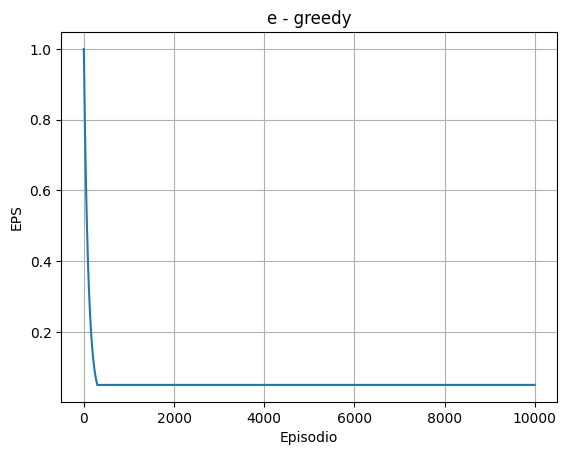

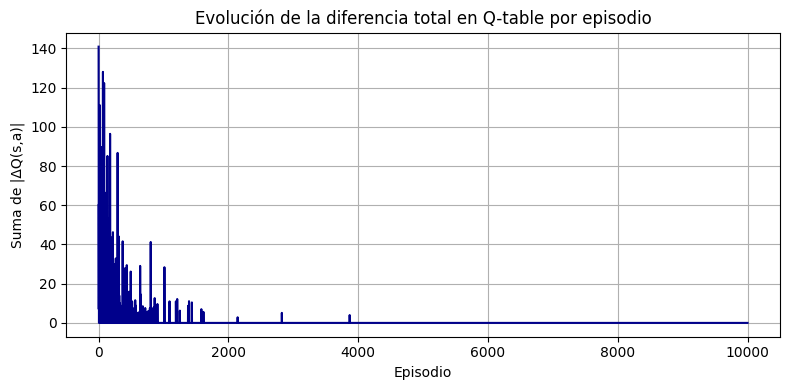

In [ ]:
rng = np.random.default_rng(seed=42)
env = ThermalEnv()

pi, q_table, q_tables_by_episode, rewards, td_errors_per_episode = q_learning_thermal(
    rng, env,
    n_episodes=10000,
    max_moves=10,
    initial_eps=1.0,
    final_eps=0.05,
    decay_rate=0.99,
    alpha=0.5,
    gamma=0.9,
    q_table=initial_q_table
)

all_actions = env.get_all_actions()

# Filtra solo los estados visitados
estados_visitados = sorted([s for s, c in estado_visitas.items() if c > 0])

# Visualiza
comparar_q_tables(q_tables_by_episode, all_actions)


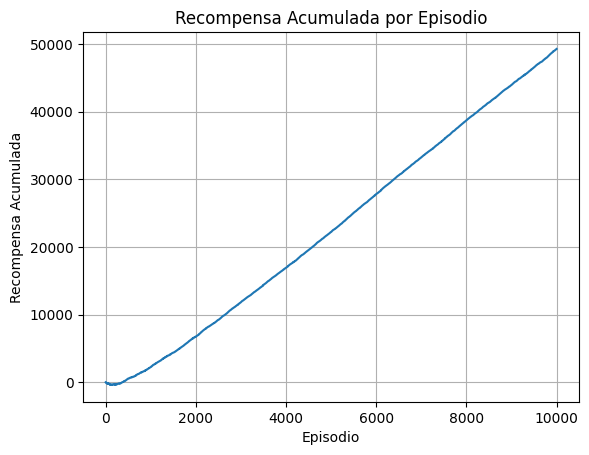

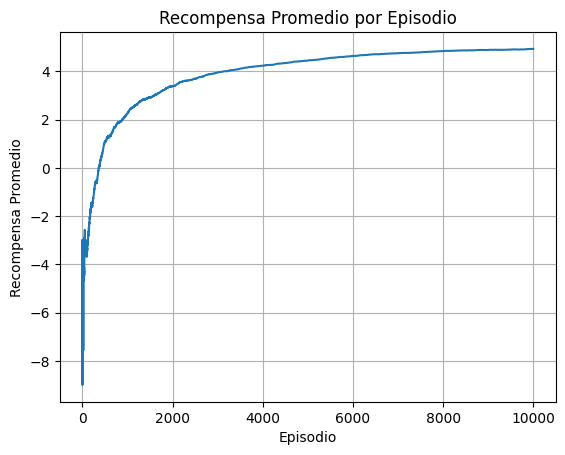

In [ ]:
# Recompensa acumulada
cumulative_rewards = np.cumsum(rewards)

# Recompensa promedio por episodio
average_rewards = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)

# Gráfica de recompensa acumulada
plt.figure()
plt.plot(cumulative_rewards)
plt.title("Recompensa Acumulada por Episodio")
plt.xlabel("Episodio")
plt.ylabel("Recompensa Acumulada")
plt.grid(True)
plt.show()

# Gráfica de recompensa promedio
plt.figure()
plt.plot(average_rewards)
plt.title("Recompensa Promedio por Episodio")
plt.xlabel("Episodio")
plt.ylabel("Recompensa Promedio")
plt.grid(True)
plt.show()


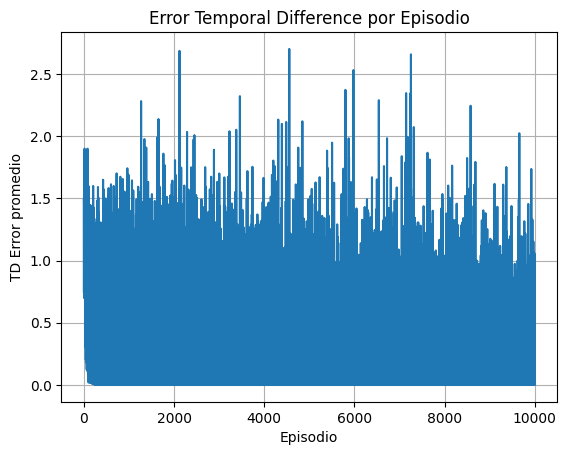

In [ ]:
plt.figure()
plt.plot(td_errors_per_episode)
plt.title("Error Temporal Difference por Episodio")
plt.xlabel("Episodio")
plt.ylabel("TD Error promedio")
plt.grid(True)
plt.show()

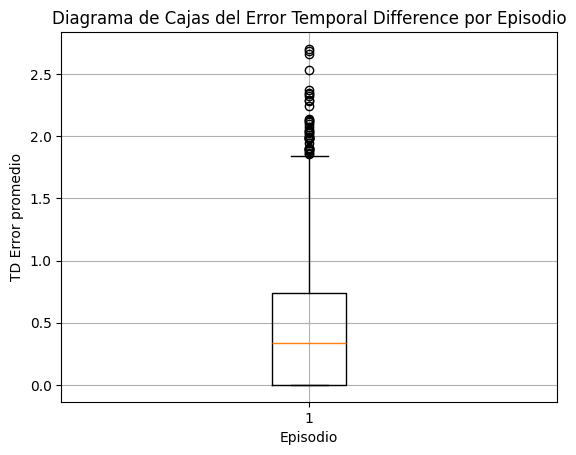

In [ ]:
# Crear un diagrama de cajas del error TD por episodio
plt.figure()
plt.boxplot(td_errors_per_episode)
plt.title("Diagrama de Cajas del Error Temporal Difference por Episodio")
plt.xlabel("Episodio")  # En un boxplot, el eje X generalmente representa grupos o categorías
plt.ylabel("TD Error promedio")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import os

# Crear una carpeta para guardar las Q-tables si no existe
output_dir = "/content/drive/MyDrive/MachineLearning/q_tables_output"
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Widget para seleccionar el número de episodio
episodio_selector = widgets.IntText(
    value=1,
    description='Episodio:',
    min=1
)

# Botones para mostrar o guardar la Q-table
boton_mostrar = widgets.Button(description="Mostrar Q-table")
boton_guardar = widgets.Button(description="Guardar como CSV")

# Función para mostrar la Q-table
def mostrar_q_table(b):
    episodio = episodio_selector.value
    if 1 <= episodio <= len(q_tables_by_episode):
        q_table = q_tables_by_episode[episodio - 1]
        q_df = pd.DataFrame.from_dict(q_table, orient='index', columns=[f'Action {j}' for j in range(n_actions)])
        display(q_df)
    else:
        print(f"❌ Episodio {episodio} no está en el rango disponible (1–{len(q_tables_by_episode)}).")

# Función para guardar la Q-table como CSV
def guardar_q_table(b):
    episodio = episodio_selector.value
    if 1 <= episodio <= len(q_tables_by_episode):
        q_table = q_tables_by_episode[episodio - 1]
        q_df = pd.DataFrame.from_dict(q_table, orient='index', columns=[f'Action {j}' for j in range(n_actions)])
        filename = f"{output_dir}/q_table_episode_{episodio}.csv"
        q_df.to_csv(filename)
        print(f"✅ Q-table del episodio {episodio} guardada como '{filename}'.")
    else:
        print(f"❌ Episodio {episodio} no está en el rango disponible (1–{len(q_tables_by_episode)}).")

# Asociar funciones a los botones
boton_mostrar.on_click(mostrar_q_table)
boton_guardar.on_click(guardar_q_table)

# Mostrar widgets
display(episodio_selector, boton_mostrar, boton_guardar)

IntText(value=1, description='Episodio:')

Button(description='Mostrar Q-table', style=ButtonStyle())

Button(description='Guardar como CSV', style=ButtonStyle())

In [ ]:
print("✅ Política aprendida (estado → acción óptima):\n")
for s, a in list(pi.items())[:20]:  # muestra solo los primeros 20
    print(f"{s} → {ACTIONS[a]}")


✅ Política aprendida (estado → acción óptima):

(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0) → Bajar temperatura
(1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0) → No hacer nada
(1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0) → Prender ventilación
(2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0) → No hacer nada
(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0) → No hacer nada
(1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0) → No hacer nada
(1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0) → Prender ventilación
(1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0) → Bajar temper

In [ ]:
for s, a in pi.items():
    if s[1] == 0 and s[4] == 0:
        print(f"{s} → Acción aprendida: {ACTIONS[a]}")


(1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: No hacer nada
(1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: No hacer nada
(2.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0) → Acción aprendida: Prender ventilación
(1.0, 0.0, 2.0, 1.0, 0.0

In [ ]:
# Diccionario de interpretación de variables discretizadas
state_labels = {
    0: {0: "baja (15–23 °C)", 1: "media (24–30 °C)", 2: "alta (31–38 °C)"},  # temp_int
    1: {0: "0 personas", 1: "1–5 personas", 2: "6–10 personas"},              # n_people
    2: {0: "dispersas", 1: "agrupadas cerca ventilación", 2: "agrupadas lejos"},  # location
    3: {0: "muy fría (0–1)", 1: "neutra (2–3)", 2: "muy calurosa (4–5)"},     # opinion
    4: {0: "no hay clase", 1: "hay clase"},                                 # schedule
    5: {0: "baja (20–24 °C)", 1: "media (25–30 °C)", 2: "alta (31–35 °C)"},  # temp_ext
    6: {0: "apagado", 1: "encendido"}                                       # ac_status
}

print("\n🔍 Interpretación detallada de los primeros 20 estados:\n")
for s, a in list(pi.items())[:20]:
    description = []
    for i in range(7):
        val = s[i]
        if isinstance(val, float) and np.isnan(val):
            label = "NaN"
        else:
            label = state_labels[i][val]
        variable_name = [
            "Temp. int", "N° personas", "Ubicación",
            "Opinión térmica", "Horario dentro de 30min", "Temp. ext", "AC"
        ][i]
        description.append(f"{variable_name}: {label}")

    print(" | ".join(description))
    print(f" → Acción recomendada: {ACTIONS[a]}\n")


🔍 Interpretación detallada de los primeros 20 estados:

Temp. int: media (24–30 °C) | N° personas: 1–5 personas | Ubicación: dispersas | Opinión térmica: neutra (2–3) | Horario dentro de 30min: no hay clase | Temp. ext: baja (20–24 °C) | AC: apagado
 → Acción recomendada: Bajar temperatura

Temp. int: media (24–30 °C) | N° personas: 6–10 personas | Ubicación: dispersas | Opinión térmica: neutra (2–3) | Horario dentro de 30min: no hay clase | Temp. ext: baja (20–24 °C) | AC: apagado
 → Acción recomendada: Prender ventilación

Temp. int: media (24–30 °C) | N° personas: 1–5 personas | Ubicación: agrupadas lejos | Opinión térmica: muy calurosa (4–5) | Horario dentro de 30min: no hay clase | Temp. ext: baja (20–24 °C) | AC: apagado
 → Acción recomendada: No hacer nada

Temp. int: media (24–30 °C) | N° personas: 1–5 personas | Ubicación: agrupadas cerca ventilación | Opinión térmica: neutra (2–3) | Horario dentro de 30min: no hay clase | Temp. ext: baja (20–24 °C) | AC: apagado
 → Acción re

In [ ]:
# Crear una lista para almacenar las filas del DataFrame
policy_data = []

for s, a in pi.items():
    description = []
    for i in range(7):
        val = s[i]
        variable_name = [
            "temp_interna_discretizada", "n_people", "location",
            "thermal_opinion", "clases a continuación", "temp_externa_discretizada", "estado del aire"
        ][i]
        if i in state_labels and val in state_labels[i]:
             label = state_labels[i][val]
        elif isinstance(val, float) and np.isnan(val):
             label = "NaN"
        else:
             label = str(val) # Fallback to string representation

        description.append(f"{variable_name}: {label}")

    state_description = " | ".join(description)
    optimal_action = ACTIONS[a]

    policy_data.append({
        'State': s,
        'State Description': state_description,
        'Optimal Action': optimal_action
    })

# Crear el DataFrame
policy_df = pd.DataFrame(policy_data)

# Definir la ruta para guardar el CSV
output_dir = "/content/drive/MyDrive/MachineLearning/q_tables_output"
os.makedirs(output_dir, exist_ok=True) # Asegurar que el directorio existe
policy_filename = f"{output_dir}/learned_policy_with_interpretation.csv"

# Guardar el DataFrame en un archivo CSV
policy_df.to_csv(policy_filename, index=False)

print(f"✅ Política aprendida con interpretación guardada en '{policy_filename}'.")

✅ Política aprendida con interpretación guardada en '/content/drive/MyDrive/MachineLearning/q_tables_output/learned_policy_with_interpretation.csv'.
